# Deep Neural Networks:
1. The DNN simply learns from the raw pixels what makes up an Image and tries to find similar pixels to identify which image.
2. A deep neural network (DNN) is an Artificial Neural network (ANN) with multiple layers between the input and output layers, hence the name "Deep" n/ws.
3. DNNs can model complex non-linear relationships.

In [1]:
import keras
import tensorflow as tf

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
print(training_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
print(training_labels[0])

9


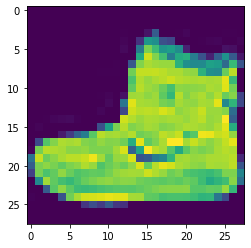

In [6]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

###### Normalizing training and test dataset b/w 0 and 1 as Neural n/ws work best with Normalized dataset

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called 'normalizing'...and fortunately in Python it's easy to normalize a list like this without looping.

In [7]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [8]:
# Here we are building a 3 layered Neural n/w -> Flatten, Dense and Dense

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),  
                                     # relu -> if x>0, return x else 0
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) 
                                # softmax -> converts the max value to 1 and rest all to 0, where we can consider 1 as our o/p

In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(), 
             loss = 'sparse_categorical_crossentropy', 
             metrics = ['accuracy'])

In [10]:
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6325 - accuracy: 0.7836
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8598
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3442 - accuracy: 0.8741
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3100 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2954 - accuracy: 0.8915


In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

313/313 [==============================] - 1s 2ms/step - loss: 0.3565 - accuracy: 0.8708


(0.3564804792404175, 0.8708000183105469)

# Predictions

In [12]:
import numpy as np

predictions = model.predict(test_images)
print(predictions[4])

[1.06303684e-01 2.66841107e-06 1.70506444e-02 9.36195068e-03
 2.39544688e-03 1.18311368e-06 8.64658117e-01 4.36233876e-07
 2.24533549e-04 1.30968237e-06]


In [13]:
print(test_labels[4])

6


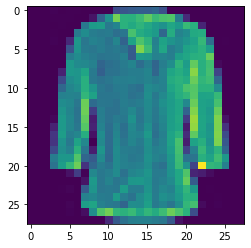

In [14]:
import matplotlib.pyplot as plt
plt.imshow(test_images[4])

In [15]:
print(np.argmax(np.round(predictions[4])))

6


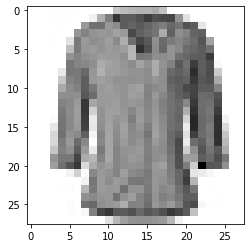

In [16]:
plt.imshow(test_images[4].reshape(28, 28), cmap = plt.cm.binary)
plt.show()

### Conclusion: The model is accurately able predict an Image using training images and training labels